The first function will import the necessary packages needed for this code. 

•	Pandas allow the manipulation and reading of data from various sources.

•	Geopandas allow for the manipulation of raster and vector data.

•	Folium allows for the creation of an interactive map.


In [43]:
#import necessary packages.

import pandas as pd
import geopandas as gpd
import folium

The following function uses geopandas to read the geographical data of the following shapefiles produced on ArcGIS Pro, Shipwrecks.shp and profileline.shp, the codes also stores the contents of these files into an object name. 


In [44]:
#Load geographical data

shipwrecks= gpd.read_file('data/shipwrecks.shp')
interpolateline = gpd.read_file('data/profileline.shp')

The .head() function allows us to view the top five rows in a data frame, we can specify how many rows we would like to examine by using an integer, this value will depend on how many data sets are contained within this file, we should also take into account that as the data starts at zero we must apply the number of rows to accommodate this i.e. we had eleven rows in total so we write ten.

In [70]:
#Inspect the data contained within the shapefile.

shipwrecks.head(11)

Wreck_no                  Name Status         Lat         Long Depth   
0     5217.0               UNKNOWN   LIVE  54 47’.250  005 35’.067    78  \
1     5155.0               TIBERIA   LIVE  54 46’.671  005 38’.829    24   
2    64129.0                 AZURE   LIVE  54 46’.046  005 39’.025    35   
3     5152.0              CHIRRIPO   LIVE  54 45’.921  005 40’.761  11.6   
4     5147.0               ROSE II   LIVE  54 44’.271  005 38’.829  16.4   
5     5279.0  SEA EMPRESS (debris)   LIVE  54 44’.242  005 36’.502    28   
6     5144.0               UNKNOWN   LIVE  54 43’.200  005 43’.800     9   
7     5136.0                 LAGAN   LIVE  54 42’.987  005 35’.312    27   
8     5264.0               KARANAN   LIVE  54 42’.883  005 31’.710    34   
9     5137.0             TROUTPOOL   LIVE  54 41’.787  005 40’.378  10.4   
10    5132.0              ANNAGHER   LIVE  54 41’.005  005 37’.829     7   

              Position_q     DD_Lat   DD_Long                        geometry  
0             Unreliable  54.787500 -5.584450  POINT (719597.353 6076495.399)  
1        Precisely known  54.777850 -5.647150  POINT (715619.079 6075227.524)  
2        Precisely known  54.767433 -5.650417  POINT (715464.468 6074059.029)  
3        Precisely known  54.765350 -5.679350  POINT (713614.991 6073738.779)  
4        Precisely known  54.737850 -5.647150  POINT (715831.927 6070779.089)  
5        Precisely known  54.737367 -5.608367  POINT (718330.148 6070845.411)  
6             Unreliable  54.720000 -5.730000  POINT (710593.208 6068542.055)  
7        Precisely known  54.716450 -5.588533  POINT (719719.586 6068581.243)  
8   Precisely known (15)  54.714717 -5.528500  POINT (723594.087 6068578.220)  
9        Precisely known  54.696450 -5.672967  POINT (714389.154 6066095.778)  
10         Surveyed (25)  54.683417 -5.630483  POINT (717195.314 6064777.007)

In [46]:
interpolateline.head()

Name  Text  IntegerVal  DoubleValu  DateTime    Shape_Leng   
0   NaN   NaN           0         0.0       NaN  17272.576466  \

                                            geometry  
0  LINESTRING Z (708769.328 6064777.444 -7.272, 7...

.crs provides the spatial reference system of a data file, this can be used to ensure that all the data set contain the same spatial reference system. The data files used all use the reference system UTM 29N.

In [47]:
#Inspect the spatial reference system.

shipwrecks.crs

<Projected CRS: PROJCS["WGS_1984_Complex_UTM_Zone_29N",GEOGCS["WGS ...>
Name: WGS_1984_Complex_UTM_Zone_29N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [48]:
interpolateline.crs

<Projected CRS: PROJCS["WGS_1984_Complex_UTM_Zone_29N",GEOGCS["WGS ...>
Name: WGS_1984_Complex_UTM_Zone_29N
Axis Info [cartesian]:
- [east]: Easting (metre)
- [north]: Northing (metre)
Area of Use:
- undefined
Coordinate Operation:
- name: UTM zone 29N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

.bounds allows us to examine the minimum and maximum x and y coordinates for each geometry within a Geodata frame.

In [49]:
# Inspect geometry within the Geodata frame.

print(shipwrecks.bounds)

             minx          miny           maxx          maxy
0   719597.352875  6.076495e+06  719597.352875  6.076495e+06
1   715619.079394  6.075228e+06  715619.079394  6.075228e+06
2   715464.468203  6.074059e+06  715464.468203  6.074059e+06
3   713614.990723  6.073739e+06  713614.990723  6.073739e+06
4   715831.927340  6.070779e+06  715831.927340  6.070779e+06
5   718330.147607  6.070845e+06  718330.147607  6.070845e+06
6   710593.208499  6.068542e+06  710593.208499  6.068542e+06
7   719719.586056  6.068581e+06  719719.586056  6.068581e+06
8   723594.087340  6.068578e+06  723594.087340  6.068578e+06
9   714389.153928  6.066096e+06  714389.153928  6.066096e+06
10  717195.314459  6.064777e+06  717195.314459  6.064777e+06
11  709212.681788  6.068168e+06  709212.681788  6.068168e+06
12  709763.111966  6.064417e+06  709763.111966  6.064417e+06


In [50]:
# Inspect geometry within the Geodata frame.

print (interpolateline.bounds)

         minx          miny         maxx          maxy
0  708769.328  6.064777e+06  723874.1128  6.073155e+06


The next function allows us to create a folium map and add the shipwrecks shapefile to our map, we use the Name column to specify which attribute we would like to display, as indicate previously we can see that with the .head() function the attribute that shows the names of the shipwrecks is called Name. next we can choose what to call the layer with the name=  function, if this is not done the final names in our layer can become confusing.

In [51]:
#Load data onto a folium Map.

m = shipwrecks.explore ('Name',
                       name = 'Shipwrecks')


In [52]:
(m)

In [53]:
#Load data onto a folium Map.

interpolateline.explore('Shape_Leng',
                 name = 'Interpolate line',       
                 m=m, 
                 marker_type='marker',
                 popup= True, 
                 legend=False, 
                )

In [54]:
# Create a folium layer object with a marker and popup for Bathymetry Profile

folium.Marker([54.721509, -5.638968], 
              popup="<h1> Bathymetry Profile</h1><img src = 'data/bathprofile.jpg' width = 400px><p>A profile of the seafloor at belfastlough </p>").add_to(m)

In [55]:
# Create a folium layer object with a marker and popup for Chirripo Shipwreck

folium.Marker([54.764282, -5.682912], 
              popup="<h1> Chirripo Shipwreck</h1><img src = 'data/Chirripo.png' width = 350px><p>A cloudpoint image of the Shipwreck Chirripo. The SS- Chirripo sank in 1917 off Black Head after it struck a UC-75 mine while deployed U-boat in the German Imperial Navy during the first World War. The wreck is in excellent condition and the impact blast is still visible as shown in the point cloud image. </p>").add_to(m)

In [56]:
# Create a folium layer object with a marker and popup for Tiberia Shipwreck

folium.Marker([54.777788, -5.647781], 
              popup="<h1> Tiberia Shipwreck</h1><img src = 'data/Tiberia.png' width = 350px><p>A cloudpoint image of the Shipwreck Tiberia. The SS. Tiberia was a merchant ship that was sunk by a torpedo during the first world war. The wreck is good condition and the impact site can still be seen as shown in the point cloud.  </p>").add_to(m)

In [57]:
(m)

The next set of functions allow us to add an image over lay to the map. This image overlay allows us to see some f the characteristics of the seafloor such as slope, bathymetry and sediment. Some key parts of the function include.

•	folium.raster_layers.ImageOverlay(name='Name', image='data/jpeg', this allows us create an image to place within our folium map, it also allows us create a name for the layer.

•	Bound=, this allows to position the image in our desired place by adding minimum latitude and longitude and the maximum latitude and longitude.


In [58]:
#Create image overlay.

bathimg_overlay = folium.raster_layers.ImageOverlay(name='bathmetry', image='data/bathymetry.jpg',
                                               bounds = [[54.642217, -5.868156], [54.822677, -5.381554]])

In [59]:
bathimg_overlay.add_to(m)

In [60]:
slopeimg_overlay = folium.raster_layers.ImageOverlay(name='slope', image='data/slope.jpg',
                                               bounds = [[54.642217, -5.868156], [54.822677, -5.381554]])

In [61]:
slopeimg_overlay.add_to(m)

In [62]:
sedimentimg_overlay = folium.raster_layers.ImageOverlay(name='sediment', image='data/sediment.jpg',
                                               bounds = [[54.642217, -5.868156], [54.822677, -5.381554]])

In [63]:
sedimentimg_overlay.add_to(m)

In [64]:
#Create the layer control

folium.LayerControl().add_to(m)


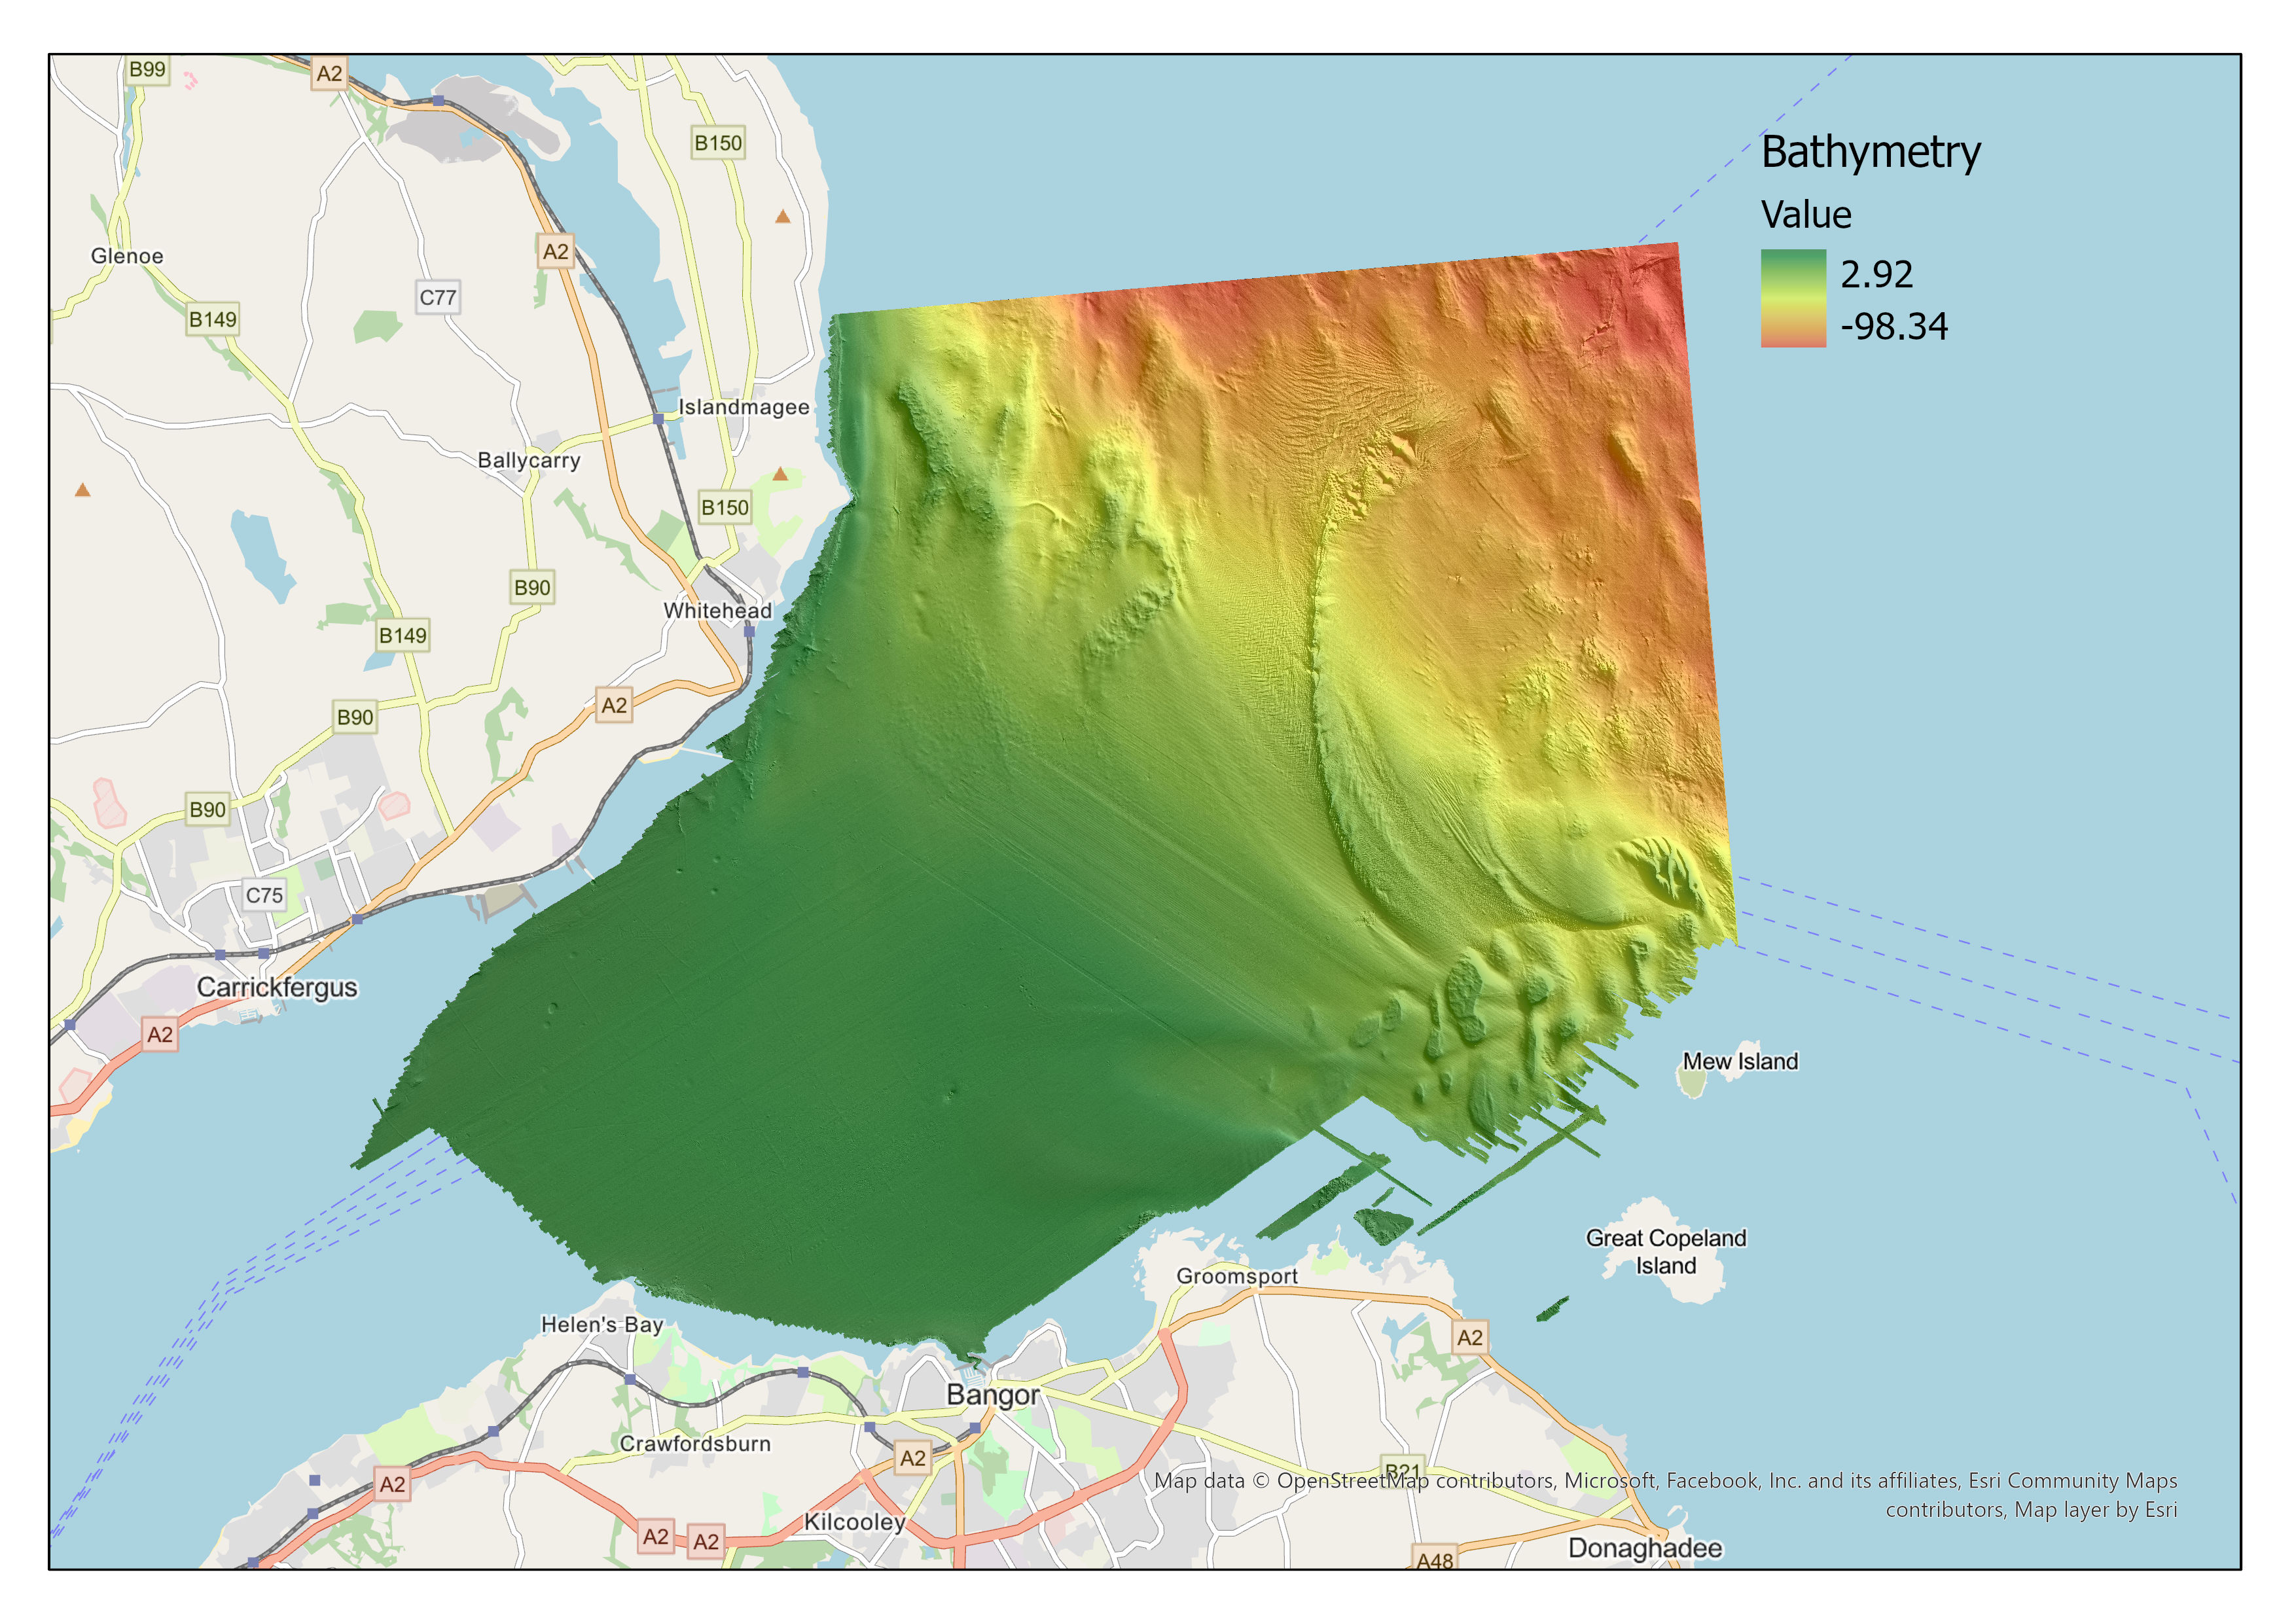
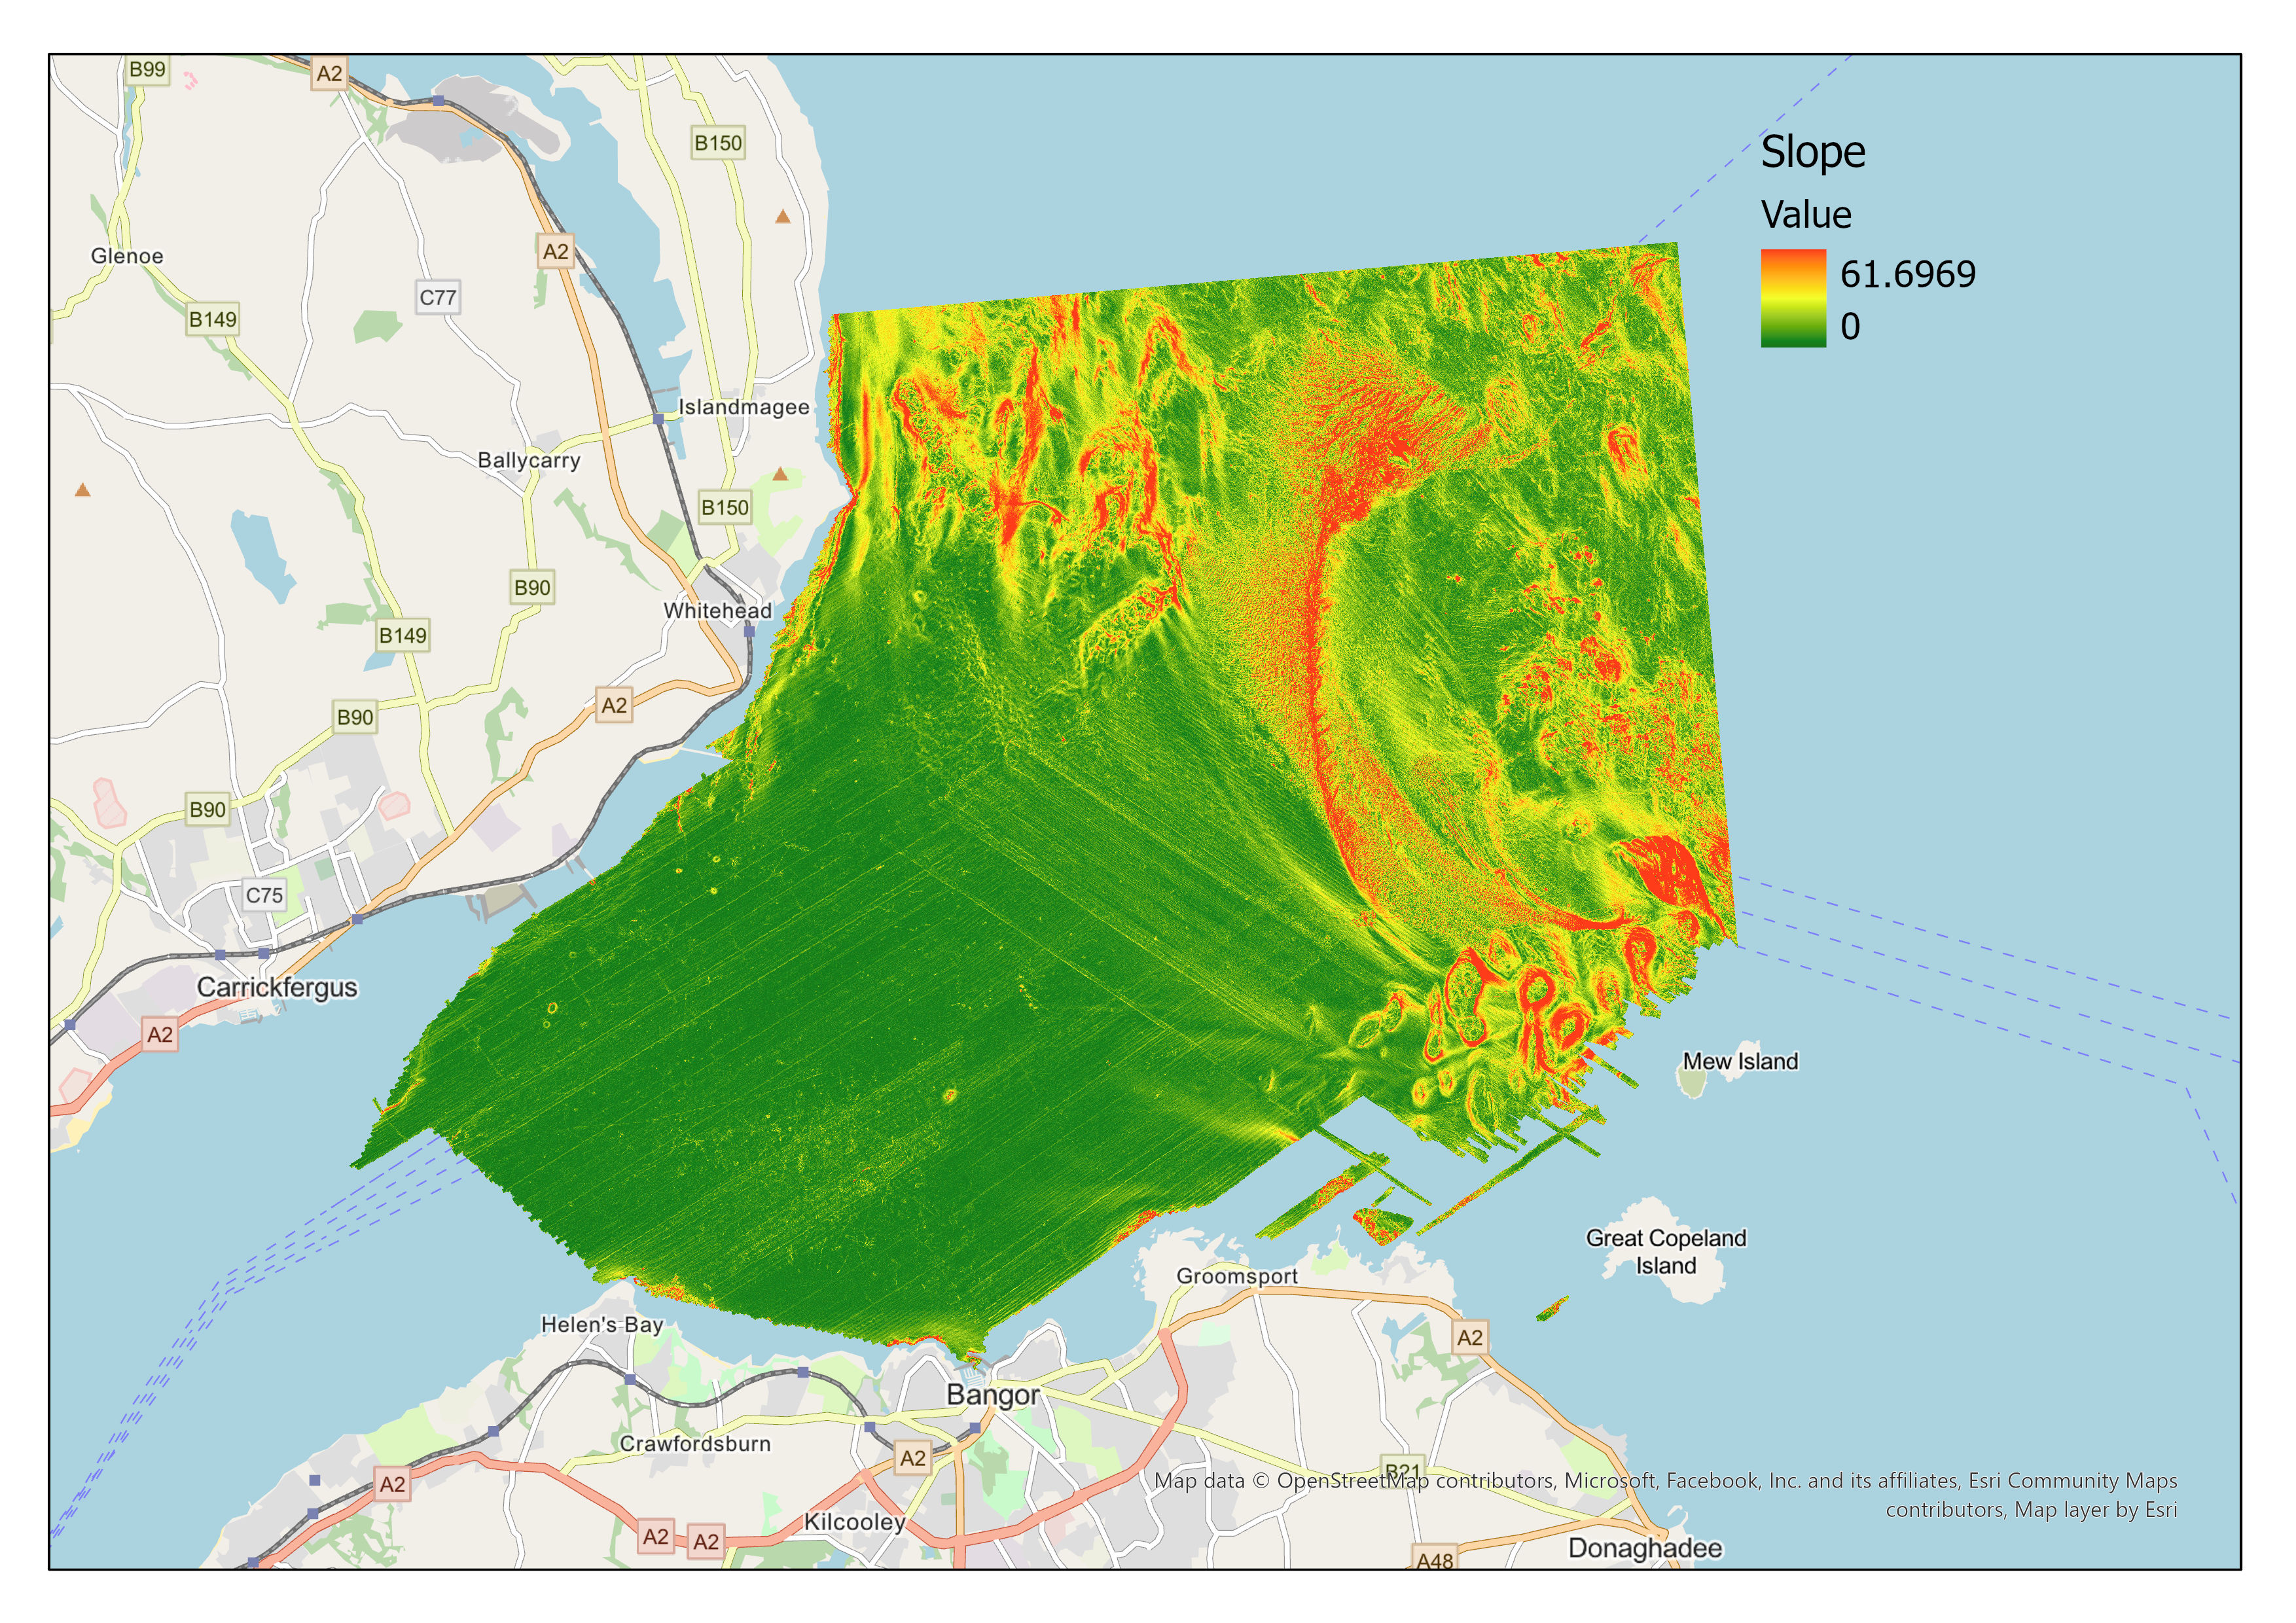
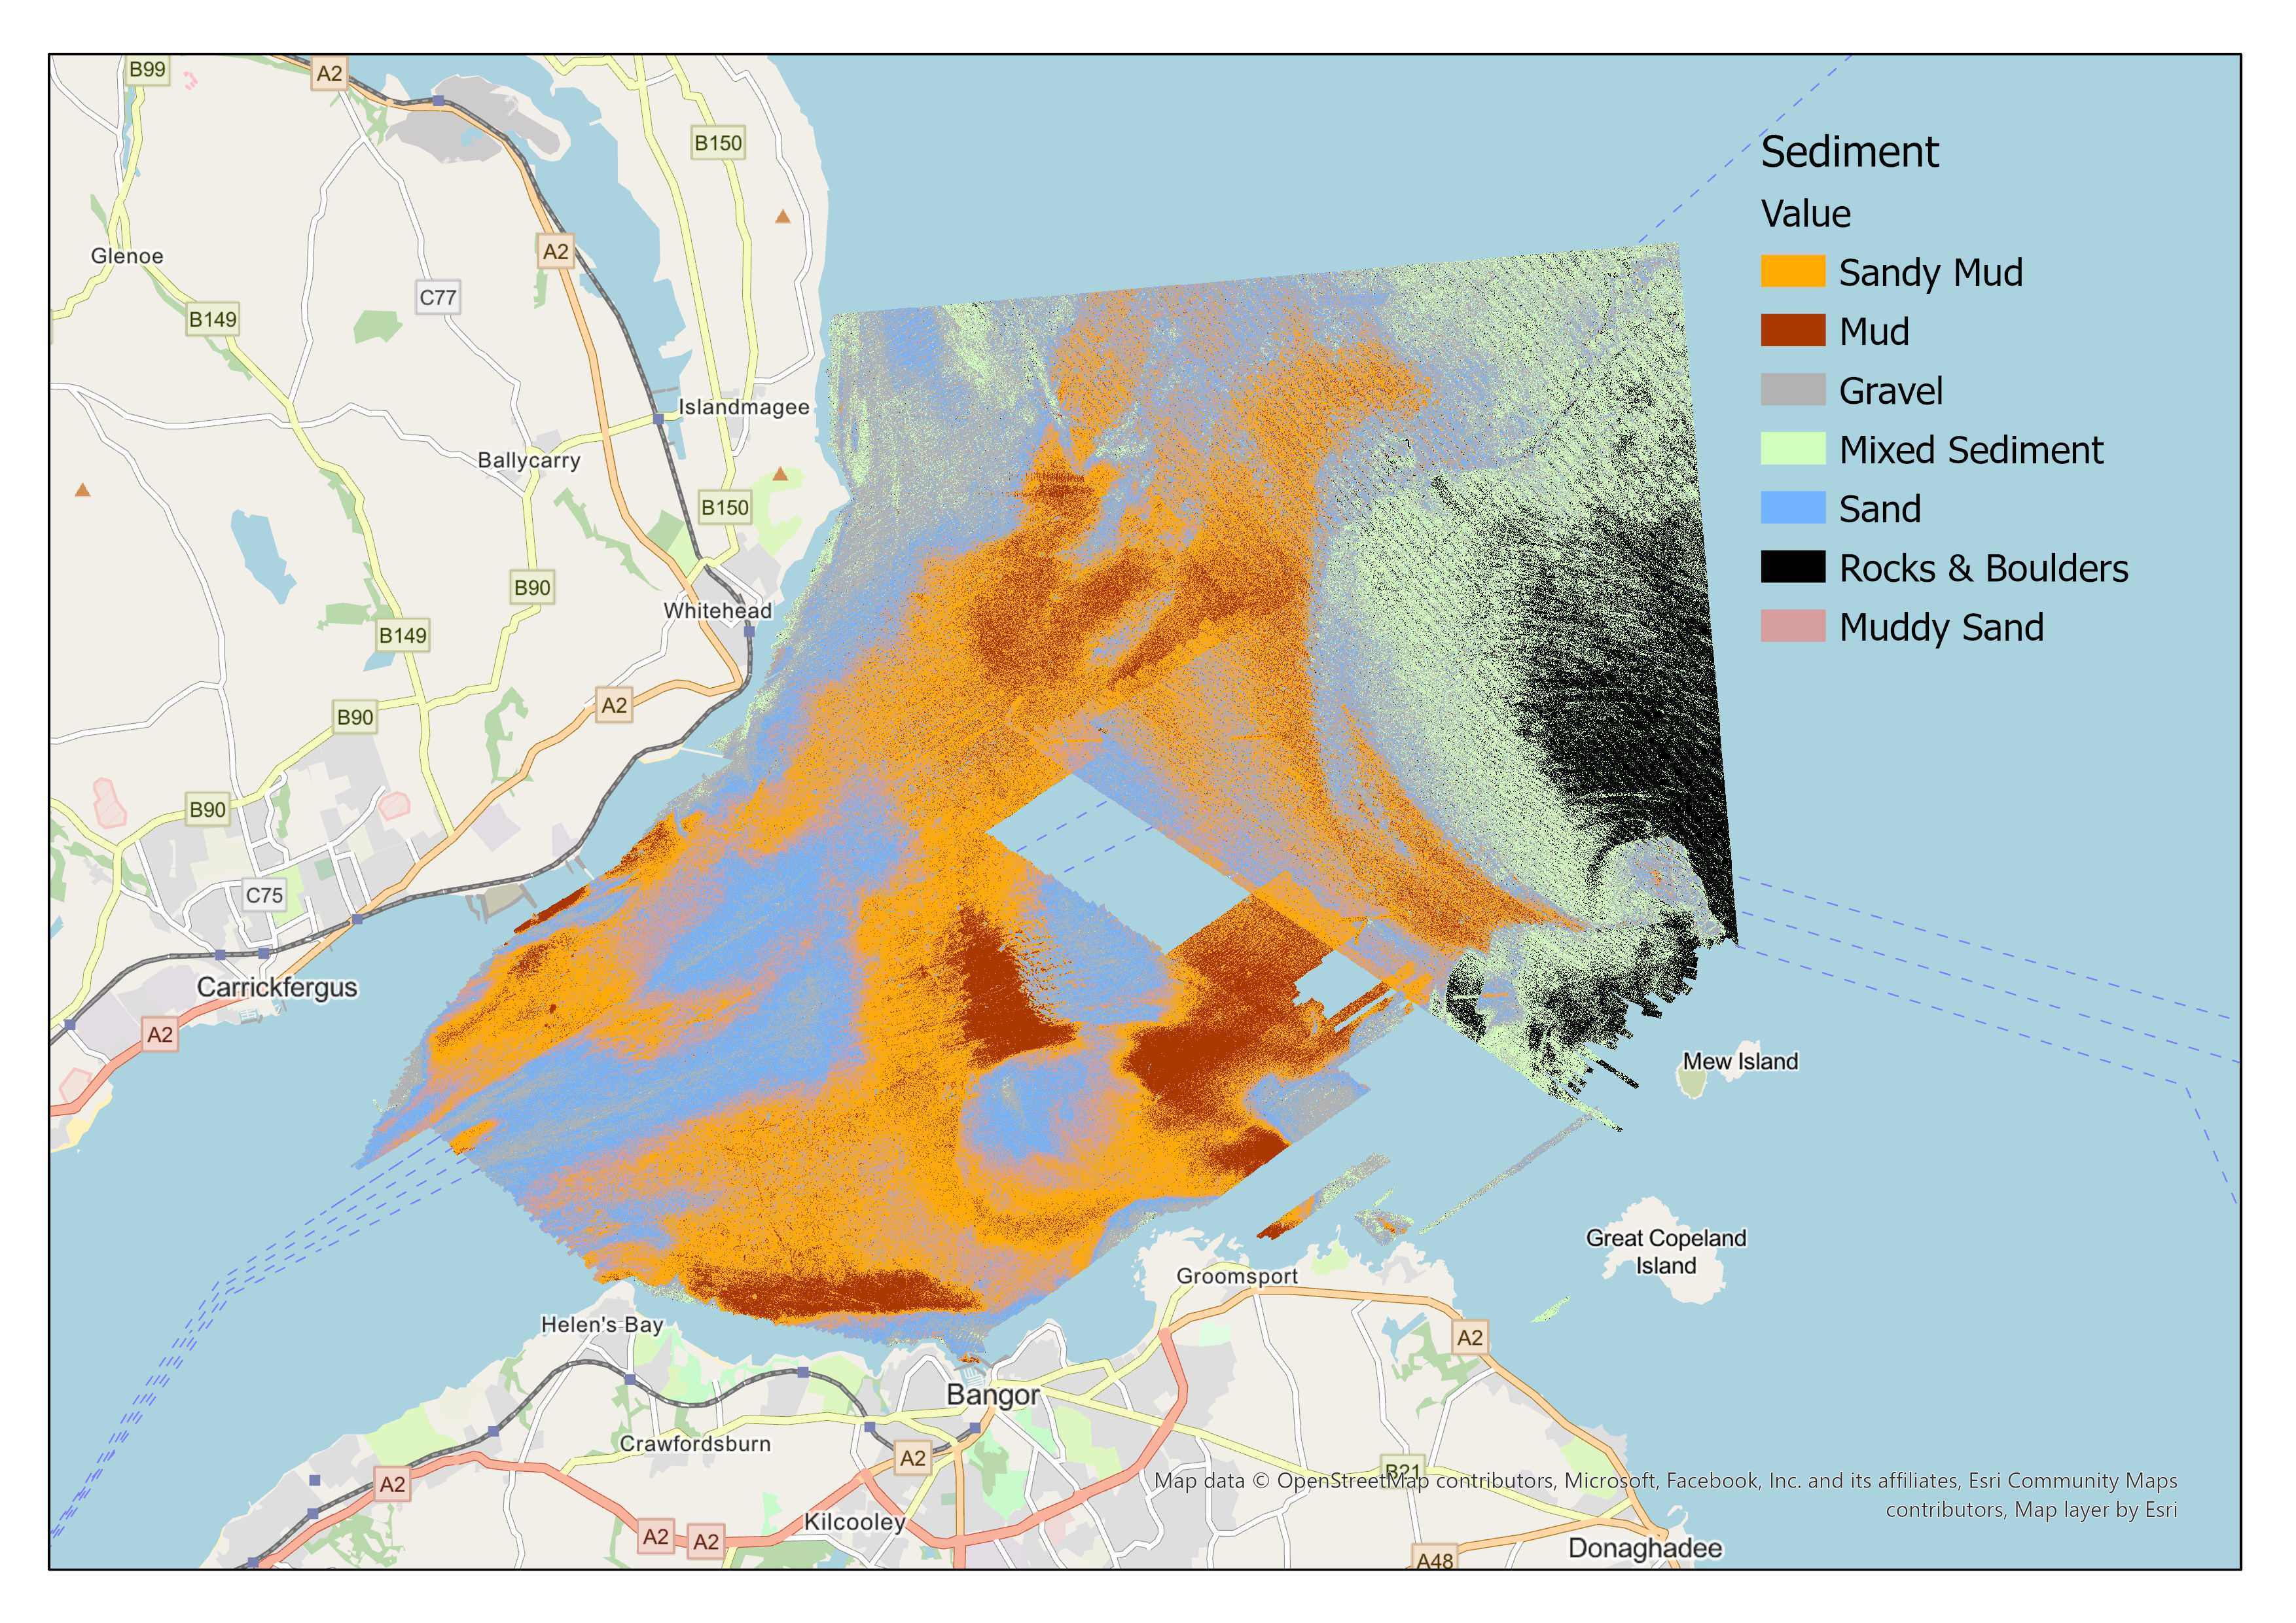

In [65]:
m